In [15]:
import pickle as pkl
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [83]:
def plot_results(results, path):
    plt.close('all')
    fig = plt.figure(figsize=(8, 8))

    # Ploting Training Loss 
    trainingLoss = results['loss']
    x_axis_train = np.array(range(len(trainingLoss)))

    testfreq = math.floor(len(results['loss']) / len(results['auc_test'])) 

    x_axis_test = np.array(list(range(len(results['auc_test']))))
    x_axis_test = [x * testfreq for x in x_axis_test]

    ax = fig.add_subplot(3, 1, 1)

    ax.plot(x_axis_train, trainingLoss)
    ax.set_ylabel('ELBO Loss')
    ax.set_xlabel('Epoch')
    ax.set_title('Training ELBO Loss (with KL Regularization)')
    ax.legend(['Train'], loc='upper right')

    # Plotting Accuracy

    # trainingACC = np.array(results['acc_val'])
    # testingACC = np.array(results['acc_test'])

    # print(trainingLoss.shape)
    # print(trainingACC.shape)

    # ax = fig.add_subplot(2, 2, 2)
    # ax.plot(x_axis_train, trainingACC)
    # ax.plot(x_axis_test, testingACC)
    # ax.set_ylabel('Accuracy')
    # ax.set_title('Model Accuracy')
    # ax.legend(['Train', 'Test'], loc='upper right')

    # Plotting AUC 
    trainingAUC = results['auc_val']
    testingAUC = results['auc_test']

    ax = fig.add_subplot(3, 1, 2)
    ax.plot(x_axis_train, trainingAUC)
    ax.plot(x_axis_test, testingAUC)
    ax.set_ylabel('AUC')
    ax.set_xlabel('Epoch')
    ax.set_title('Model AUC')
    ax.legend(['Train', 'Test'], loc='upper right')

    # Plotting AP 
    trainingAP = results['ap_val']
    testingAP = results['ap_test']

    ax = fig.add_subplot(3, 1, 3)
    ax.plot(x_axis_train, trainingAP)
    ax.plot(x_axis_test, testingAP)
    ax.set_ylabel('AP')
    ax.set_xlabel('Epoch')
    ax.set_title('Model AP')
    ax.legend(['Train', 'Test'], loc='upper right')

    fig.tight_layout()
    fig.savefig(path)

In [86]:
results = pkl.load(open('../models/CORA_RESULTS.p', 'rb'))
path = '../figures/geometric/CORA_RESULTS.png'

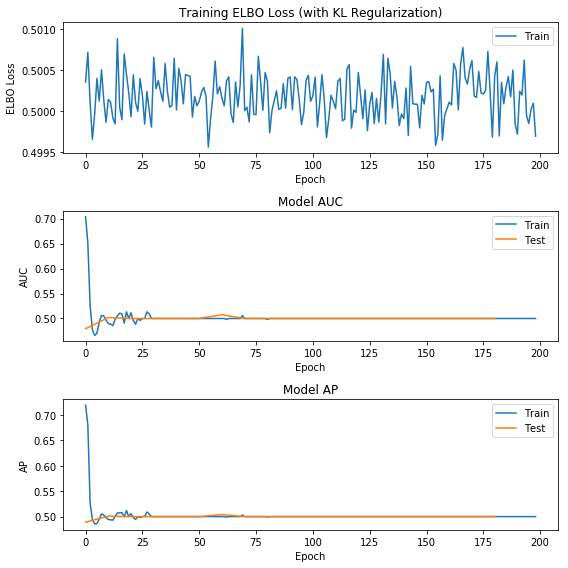

In [87]:
plot_results(results, path)